# 전처리 수정한 버전

In [4]:
import os
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.externals import joblib

warnings.filterwarnings(action='ignore');
from utils import getCode

c:\users\youjeongsue\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [115]:
env_mean = pd.DataFrame(columns=list(set(target_env['fatrCode'])))
env_mean.head()

,WS,EL,CI,PL,HE,TE,WD,PI,HI,EO,TL,EI,IR,PO,SO,SI,HL,TI,RP


In [3]:
target_env = pd.read_csv('./data/target_env.csv', index_col=0)
target_env.head()

,fatrCode,facilityId,measDate,fldCode,sectCode,itemCode,senVal,ymd,cntCollect,num,totalRows,totalPage,currentPage
0,RP,PF_0000227_01,2017-01-01 00:00:00,FG,EO,80300,0.00,20170101,26,1,90376.0,91.0,1.0
1,WD,PF_0000227_01,2017-01-01 00:00:00,FG,EO,80300,48.96,20170101,26,2,NaN,NaN,NaN
2,IR,PF_0000227_01,2017-01-01 00:00:00,FG,EI,80300,0.00,20170101,26,3,NaN,NaN,NaN
3,HL,PF_0000227_01,2017-01-01 00:00:00,FG,EL,80300,91.38,20170101,26,4,NaN,NaN,NaN
4,TI,PF_0000227_01,2017-01-01 00:00:00,FG,EI,80300,13.20,20170101,26,5,NaN,NaN,NaN


In [4]:
target_user =['PF_0000227',
 'PF_0010019',
 'PF_0006025',
 'PF_0006024',
 'PF_0006042',
 'PF_0006043',
 'PF_0006023',
 'PF_0001405',
 'PF_0000304']

cultivate_columns = [
 'growLength',
 'flowerTop',
 'stemDiameter',
 'leavesLength',
 'leavesWidth',
 'leavesNum',
 'flowerPosition',
 'fruitsPosition',
 'fruitsNum']

dellist = ['statusCode',
 'statusMessage',
 'itemCode',
  'sampleNum',
 'harvestPosition',
 'ped',
 'solarCorrection',
 'fruitsWeight']

In [6]:
cultivate_df = pd.read_csv('./data/all_cultivate_df.csv', index_col=0)
target_cultivate = cultivate_df[cultivate_df['userId'].isin(target_user)]
target_cultivate = target_cultivate[target_cultivate['statusCode']!=0.0]

for delcode in dellist:
    del target_cultivate[delcode]
    
target_cultivate.sort_values(by=['userId', 'measDate'])

,measDate,userId,growLength,flowerTop,stemDiameter,leavesLength,leavesWidth,leavesNum,flowerPosition,fruitsPosition,fruitsNum
1,2017-03-19 00:00:00,PF_0000227,231.0,13.5,10.40,36.6,28.5,20.0,13.70,1.70,5.0
41,2017-03-19 00:00:00,PF_0000227,229.0,8.2,7.65,34.9,19.5,21.0,12.70,1.70,5.0
42,2017-03-19 00:00:00,PF_0000227,239.0,15.1,9.91,36.3,33.5,21.0,14.30,1.30,4.0
2,2017-03-26 00:00:00,PF_0000227,35.7,21.5,10.18,39.2,28.6,17.0,11.70,1.70,5.0
11,2017-03-26 00:00:00,PF_0000227,32.4,13.1,6.70,36.2,29.8,13.0,6.20,2.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...
98,2020-05-18 00:00:00,PF_0010019,17.0,7.0,5.80,30.5,18.0,20.0,5.54,44.47,137.0
32,2020-05-25 00:00:00,PF_0010019,0.0,13.5,7.38,42.0,39.0,14.0,1.00,44.85,103.0
48,2020-05-25 00:00:00,PF_0010019,0.0,16.0,9.17,43.0,35.0,13.0,1.00,35.93,108.0
49,2020-05-25 00:00:00,PF_0010019,0.0,16.0,6.47,39.0,33.0,14.0,0.92,27.75,114.0


In [129]:
reduced_temp_cultivate = pd.DataFrame(columns=cultivate_columns)

for i in range(len(target_user)):
    temp_env = target_env[target_env['facilityId']==facility_id_list[i]]
    temp_cultivate = target_cultivate[target_cultivate['userId']==target_user[i]]
    
    print(target_user[i], len(temp_cultivate))
    reduced_temp_cultivate=reduced_temp_cultivate.append(temp_cultivate[1:])
    
    for j in range(len(temp_cultivate)-1):
        filter_start = temp_env[temp_env['measDate']>=temp_cultivate.iloc[j,0]]
        filter_end = filter_start[filter_start['measDate']<temp_cultivate.iloc[j+1,0]]

        filter_groupby = filter_end[['senVal', 'fatrCode']].groupby(['fatrCode']).mean().T

        input_list=[]
        for code in list(env_mean.columns):
            try:
                input_list.append(filter_groupby[code]['senVal'])
            except:
                input_list.append(NaN)
        env_mean=env_mean.append(pd.Series(input_list, index=env_mean.columns), ignore_index=True)

PF_0000227 51
PF_0010019 99
PF_0006025 103
PF_0006024 103
PF_0006042 95
PF_0006043 103
PF_0006023 95
PF_0001405 51
PF_0000304 63


In [137]:
reduced_temp_cultivate = reduced_temp_cultivate.reset_index()

In [139]:
env_mean
# [PL, HE, PI, EO, EI, PO, SO, SI]

,WS,EL,CI,PL,HE,TE,WD,PI,HI,EO,TL,EI,IR,PO,SO,SI,HL,TI,RP
0,1.198452,9.841488,632.278690,NaN,NaN,6.910179,42.461131,NaN,88.061131,NaN,18.460000,NaN,127.018452,NaN,NaN,NaN,95.621488,17.460179,0.133750
1,1.409581,9.839581,625.905749,NaN,NaN,8.269042,42.085988,NaN,87.423533,NaN,17.159401,NaN,138.891078,NaN,NaN,NaN,96.254192,16.569521,0.078922
2,1.726706,9.809921,615.776548,NaN,NaN,13.114960,39.648532,NaN,88.142480,NaN,17.982619,NaN,183.277321,NaN,NaN,NaN,94.930833,17.895655,0.074504
3,1.703512,9.803036,606.192381,NaN,NaN,15.772024,38.516369,NaN,93.215387,NaN,19.006399,NaN,231.922946,NaN,NaN,NaN,95.204137,18.671637,0.044673
4,1.482202,9.790119,596.609702,NaN,NaN,16.599405,39.730536,NaN,95.701190,NaN,18.536667,NaN,158.558869,NaN,NaN,NaN,95.001250,18.583631,0.128810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2.874461,9.178024,379.765060,NaN,NaN,14.605659,162.007036,NaN,97.749192,NaN,0.000000,NaN,234.871916,NaN,NaN,NaN,98.042156,19.261287,4.603413
750,1.778302,9.190503,385.764088,NaN,NaN,11.647610,243.391321,NaN,97.646164,NaN,0.000000,NaN,265.213270,NaN,NaN,NaN,97.974151,19.785220,0.013648
751,2.253375,9.179750,380.000000,NaN,NaN,18.099688,165.191500,NaN,98.093500,NaN,0.000000,NaN,279.171437,NaN,NaN,NaN,97.911375,21.334500,0.076250
752,2.412126,9.166257,379.378683,NaN,NaN,17.873743,172.880090,NaN,97.841048,NaN,0.000000,NaN,331.280719,NaN,NaN,NaN,97.661946,20.560359,14.472455


In [144]:
for i in ['PL', 'HE', 'PI', 'EO', 'EI', 'PO', 'SO', 'SI']:
    print(getCode(i))
    
for i in ['PL', 'HE', 'PI', 'EO', 'EI', 'PO', 'SO', 'SI']:
    del env_mean[i]

토양PH
외부습도
(양액)공급PH
(양액)배액EC
(양액)공급EC
(양액)배액PH
(양액)총배액
(양액)총급액


In [294]:
target_env_cultivate_mean = pd.concat([env_mean, reduced_temp_cultivate], axis=1)
del target_env_cultivate_mean['measDate']
del target_env_cultivate_mean['userId']
del target_env_cultivate_mean['index']
target_env_cultivate_mean

,WS,EL,CI,TE,WD,HI,TL,IR,HL,TI,RP,growLength,flowerTop,stemDiameter,leavesLength,leavesWidth,leavesNum,flowerPosition,fruitsPosition,fruitsNum
0,1.198452,9.841488,632.278690,6.910179,42.461131,88.061131,18.460000,127.018452,95.621488,17.460179,0.133750,35.7,21.5,10.18,39.2,28.6,17.0,11.7,1.7,5.0
1,1.409581,9.839581,625.905749,8.269042,42.085988,87.423533,17.159401,138.891078,96.254192,16.569521,0.078922,26.4,1.9,5.25,39.2,28.4,15.0,27.7,21.3,64.0
2,1.726706,9.809921,615.776548,13.114960,39.648532,88.142480,17.982619,183.277321,94.930833,17.895655,0.074504,14.0,10.5,6.66,42.0,28.0,20.0,2.8,8.0,93.0
3,1.703512,9.803036,606.192381,15.772024,38.516369,93.215387,19.006399,231.922946,95.204137,18.671637,0.044673,8.0,9.0,8.80,41.0,24.0,18.0,2.4,8.0,87.0
4,1.482202,9.790119,596.609702,16.599405,39.730536,95.701190,18.536667,158.558869,95.001250,18.583631,0.128810,0.1,11.0,2.98,29.0,22.0,18.0,0.6,7.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2.874461,9.178024,379.765060,14.605659,162.007036,97.749192,0.000000,234.871916,98.042156,19.261287,4.603413,25.0,7.0,5.00,32.0,30.0,17.0,7.0,6.0,18.0
750,1.778302,9.190503,385.764088,11.647610,243.391321,97.646164,0.000000,265.213270,97.974151,19.785220,0.013648,13.0,9.0,6.50,34.0,31.0,18.0,7.0,6.0,18.0
751,2.253375,9.179750,380.000000,18.099688,165.191500,98.093500,0.000000,279.171437,97.911375,21.334500,0.076250,20.0,7.0,4.50,37.0,32.0,18.0,8.3,7.0,21.0
752,2.412126,9.166257,379.378683,17.873743,172.880090,97.841048,0.000000,331.280719,97.661946,20.560359,14.472455,24.0,7.0,3.60,32.0,24.0,16.0,8.0,7.0,21.0


In [387]:
##데이터 저장용
env_mean_for_dashboard = pd.concat([env_mean, reduced_temp_cultivate['measDate']], axis=1)
env_mean_for_dashboard.to_csv('./data/env_for_dashboard.csv')
reduced_temp_cultivate.to_csv('./data/cultivate_for_dashboard.csv')

data_for_dashboard = pd.concat([env_mean, reduced_temp_cultivate], axis=1)

for code in target_env_cultivate_mean.columns:
    data_for_dashboard[code]=data_for_dashboard[code].fillna(data_for_dashboard[code].mean())

data_for_dashboard.to_csv('./data/data_for_dashboard.csv')

minmax_for_dashboard = data_for_dashboard.copy()
for code in minmax_list:
    minmax_for_dashboard[code]=minmax_for_dashboard[code].agg(minmax, code=code)
    
minmax_for_dashboard.to_csv('./data/minmax_for_dashboard.csv')

In [296]:
for code in target_env_cultivate_mean.columns:
    target_env_cultivate_mean[code]=target_env_cultivate_mean[code].fillna(target_env_cultivate_mean[code].mean())

In [299]:
#마지막 전처리 minmax
def minmax(series, code):
    maxval = target_env_cultivate_mean[code].max()
    minval = target_env_cultivate_mean[code].min()
    return (series-minval)/(maxval-minval)


env_cultivate_mean_data_minmax = target_env_cultivate_mean.copy()
minmax_list=list(target_env_cultivate_mean.columns)
minmax_list.remove('leavesLength')
minmax_list.remove('fruitsNum')


for code in minmax_list:
    env_cultivate_mean_data_minmax[code]=env_cultivate_mean_data_minmax[code].agg(minmax, code=code)

In [385]:
env_cultivate_mean_data_minmax

,WS,EL,CI,TE,WD,HI,TL,IR,HL,TI,RP,growLength,flowerTop,stemDiameter,leavesLength,leavesWidth,leavesNum,flowerPosition,fruitsPosition,fruitsNum
0,0.204154,1.000000,0.734325,0.374888,0.029538,0.797479,0.372456,0.000000,0.957172,0.338198,0.000111,0.060818,0.383929,0.096952,39.2,0.484746,0.68,0.285366,0.017315,5.0
1,0.252141,0.999806,0.726924,0.428803,0.029255,0.784608,0.361047,0.009087,0.963505,0.286140,0.000065,0.044974,0.033929,0.050000,39.2,0.481356,0.60,0.675610,0.216948,64.0
2,0.324221,0.996792,0.715160,0.621074,0.027415,0.799122,0.368269,0.043059,0.950259,0.363652,0.000062,0.023850,0.187500,0.063429,42.0,0.474576,0.80,0.068293,0.081483,93.0
3,0.318949,0.996093,0.704029,0.726498,0.026560,0.901527,0.377249,0.080292,0.952994,0.409008,0.000037,0.013629,0.160714,0.083810,41.0,0.406780,0.72,0.058537,0.081483,87.0
4,0.268647,0.994780,0.692899,0.759326,0.027477,0.951707,0.373129,0.024140,0.950963,0.403864,0.000107,0.000170,0.196429,0.028381,29.0,0.372881,0.72,0.014634,0.071298,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.585093,0.932585,0.441057,0.680220,0.119802,0.993050,0.210526,0.082549,0.981403,0.443473,0.003816,0.042589,0.125000,0.047619,32.0,0.508475,0.68,0.170732,0.061112,18.0
750,0.335948,0.933853,0.448024,0.562854,0.181252,0.990970,0.210526,0.105772,0.980722,0.474097,0.000011,0.022147,0.160714,0.061905,34.0,0.525424,0.72,0.170732,0.061112,18.0
751,0.443927,0.932760,0.441330,0.818853,0.122207,1.000000,0.210526,0.116455,0.980094,0.564652,0.000063,0.034072,0.125000,0.042857,37.0,0.542373,0.72,0.202439,0.071298,21.0
752,0.480009,0.931389,0.440608,0.809888,0.128012,0.994904,0.210526,0.156338,0.977597,0.519403,0.011996,0.040886,0.125000,0.034286,32.0,0.406780,0.64,0.195122,0.071298,21.0


## target_env_cultivate_mean를 이용한 예측모델

In [19]:
#파일 저장후 다시 읽어와야 할 때
env_cultivate_mean_data_minmax = pd.read_csv('./data/data_for_dashboard.csv', index_col=0)
del env_cultivate_mean_data_minmax['index']
del env_cultivate_mean_data_minmax['measDate']
del env_cultivate_mean_data_minmax['userId']

In [20]:
columns=list(env_cultivate_mean_data_minmax.columns)
columns.remove('leavesLength')
columns.remove('fruitsNum')

In [10]:
from sklearn.model_selection import RepeatedKFold

def printScores(model, x, y):
    print("R^2: ",model.score(x, y))
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    mae = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    mae = np.absolute(mae)
    rmse = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    rmse = np.absolute(rmse)
    print('Mean MAE: %.3f (%.3f)' % (mean(mae), std(mae)))
    print('Mean RMSE: %.3f' % (mean(rmse)))

In [23]:
from sklearn.model_selection import train_test_split

x=env_cultivate_mean_data_minmax[columns[:]]
y_leaves=env_cultivate_mean_data_minmax['leavesLength']
y_fruits=env_cultivate_mean_data_minmax['fruitsNum']

x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(x, y_leaves, test_size=0.2)
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x, y_fruits, test_size=0.2)

### 1. OLS(statsmodels.OLS)

In [12]:
import statsmodels.api as sm

model = sm.OLS(y_train_l, x_train_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           leavesLength   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              2308.
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:52:49   Log-Likelihood:                         -1755.6
No. Observations:                 603   AIC:                                      3545.
Df Residuals:                     586   BIC:                                      3620.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
WS                 0.4156      0.580      0.717      0.474      -0.723       1.554
EL                 0.4161      0.121      3.446      0.001       0.179       0.653
CI                -0.0041      0.002     -2.233      0.026      -0.008      -0.000
TE                -0.2107      0.060     -3.492      0.001      -0.329      -0.092
WD                -0.0298      0.007     -4.355      0.000      -0.043      -0.016
HI                 0.0626      0.033      1.912      0.056      -0.002       0.127
TL                 0.0400      0.010      3.820      0.000       0.019       0.060
IR                 0.0003      0.009      0.034      0.973      -0.017       0.018
HL                 0.0180      0.012      1.552      0.121      -0.005       0.041
TI                 0.3582      0.110      3.245      0.001       0.141       0.575
RP                 0.0245      0.012      2.048      0.041       0.001       0.048
growLength         0.0046      0.003      1.464      0.144      -0.002       0.011
flowerTop         -0.0173      0.020     -0.868      0.386      -0.057       0.022
stemDiameter       0.2009      0.040      5.036      0.000       0.123       0.279
leavesWidth        0.7592      0.023     33.639      0.000       0.715       0.804
leavesNum          0.0858      0.053      1.611      0.108      -0.019       0.190
flowerPosition     0.0400      0.043      0.932      0.352      -0.044       0.124
==============================================================================
Omnibus:                      242.792   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4214.766
Skew:                          -1.316   Prob(JB):                         0.00
Kurtosis:                      15.682   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [305]:
model = sm.OLS(y_train_f, x_train_f).fit()
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              fruitsNum   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              113.8
Date:                Fri, 04 Dec 2020   Prob (F-statistic):                   7.35e-173
Time:                        16:59:50   Log-Likelihood:                         -2763.1
No. Observations:                 603   AIC:                                      5560.
Df Residuals:                     586   BIC:                                      5635.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
WS                31.5204     13.112      2.404      0.017       5.769      57.272
EL                13.1301      6.147      2.136      0.033       1.057      25.203
CI                -8.6475      7.268     -1.190      0.235     -22.922       5.626
TE                18.5634      9.064      2.048      0.041       0.762      36.365
WD              -283.5454     53.167     -5.333      0.000    -387.967    -179.124
HI               -10.8702     11.475     -0.947      0.344     -33.408      11.667
TL                53.1408      6.090      8.726      0.000      41.180      65.102
IR               -95.2772     52.373     -1.819      0.069    -198.138       7.584
HL                22.1504      5.540      3.998      0.000      11.270      33.031
TI               -23.7642     13.639     -1.742      0.082     -50.551       3.023
RP               301.7128     73.763      4.090      0.000     156.840     446.586
growLength         1.1194     11.592      0.097      0.923     -21.648      23.887
flowerTop         -8.9584      5.987     -1.496      0.135     -20.717       2.800
stemDiameter      58.6700     22.204      2.642      0.008      15.060     102.280
leavesWidth      -19.0433      6.860     -2.776      0.006     -32.517      -5.570
leavesNum         35.6043      6.983      5.099      0.000      21.890      49.319
flowerPosition    86.0934     10.253      8.397      0.000      65.956     106.231
==============================================================================
Omnibus:                       55.711   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.230
Skew:                           0.666   Prob(JB):                     1.39e-18
Kurtosis:                       4.225   Cond. No.                         136.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. OLS(sklearn.LinearRegression)

In [306]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

lm=linear_model.LinearRegression()
lm.fit(x_train_l, y_train_l)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(x_train_l, y_train_l)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

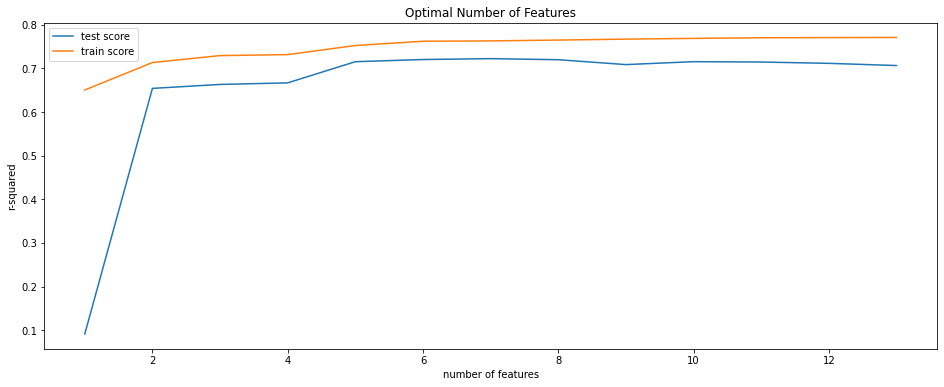

In [307]:
# plotting cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [308]:
model_cv.best_params_

{'n_features_to_select': 7}

In [309]:
n_features_optimal = 7

lm=linear_model.LinearRegression()
lm.fit(x_train_l, y_train_l)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train_l, y_train_l)

printScores(rfe, x_test_l, y_test_l)

R^2:  0.7995507018854551
Mean MAE: 3.338 (0.893)
Mean RMSE: 4.545


In [310]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

lm=linear_model.LinearRegression()
lm.fit(x_train_f, y_train_f)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(x_train_f, y_train_f)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

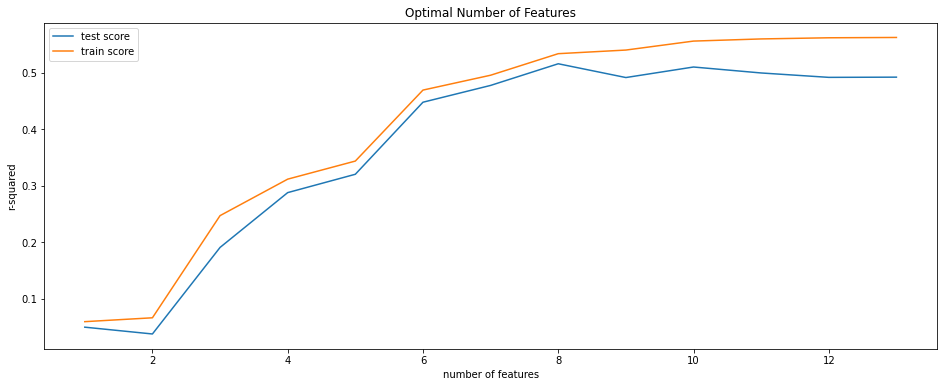

In [311]:
# plotting cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [312]:
model_cv.best_params_

{'n_features_to_select': 8}

In [316]:
n_features_optimal = 8

lm=linear_model.LinearRegression()
lm.fit(x_train_f, y_train_f)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train_f, y_train_f)

printScores(rfe, x_train_f, y_train_f)

R^2:  0.5414462621388382
Mean MAE: 19.022 (1.934)
Mean RMSE: 24.660


### 3. LASSO(sklearn)

In [317]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

lasso_params = {'alpha':[0.001, 0.02, 0.024, 0.025, 0.026, 0.03]}

model_cv = GridSearchCV(linear_model.Lasso(),
                        param_grid=lasso_params,
                        scoring='r2',
                        return_train_score=True)

model_cv.fit(x_train_l, y_train_l)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.02, 0.024, 0.025, 0.026, 0.03]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

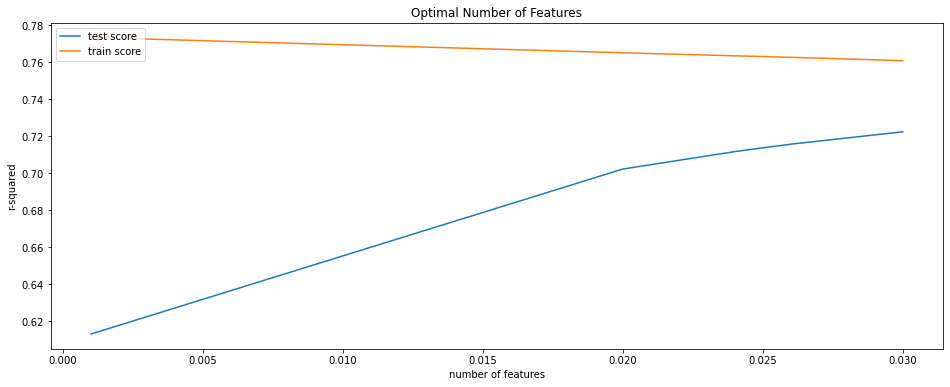

In [319]:
# plotting cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left');

In [320]:
model_cv.best_params_

{'alpha': 0.03}

In [321]:
clf=linear_model.Lasso(alpha=0.03, normalize=True)
clf.fit(x_train_l, y_train_l)

printScores(clf, x_test_l, y_test_l)

R^2:  0.7598620612826664
Mean MAE: 3.332 (0.639)
Mean RMSE: 4.296


In [322]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

lasso_params = {'alpha':[0.001, 0.02, 0.024, 0.025, 0.026, 0.03]}

model_cv = GridSearchCV(linear_model.Lasso(),
                        param_grid=lasso_params,
                        scoring='r2',
                        return_train_score=True)

model_cv.fit(x_train_f, y_train_f)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.02, 0.024, 0.025, 0.026, 0.03]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [323]:
model_cv.best_params_

{'alpha': 0.03}

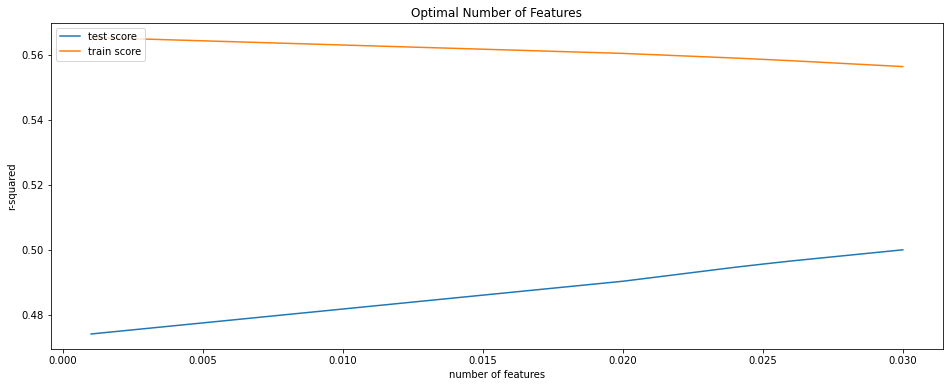

In [324]:
# plotting cv results

cv_results = pd.DataFrame(model_cv.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [327]:
clf=linear_model.Lasso(alpha=0.03)
clf.fit(x_train_f, y_train_f)

printScores(clf, x_test_f, y_test_f)

R^2:  0.4334045382436776
Mean MAE: 21.934 (4.243)
Mean RMSE: 27.398


### 4. Robust Linear Regression

In [328]:
#leavesLength, fruitsNum
x=env_cultivate_mean_data_minmax[columns[:-1]]
y_leaves=env_cultivate_mean_data_minmax['leavesLength']
model = sm.RLM(y_leaves, x).fit()

r2=1. - np.sum(np.abs(model.predict(x) - y_leaves) **2) / np.sum(np.abs(y_leaves - np.mean(y_leaves)) ** 2)
print("r^2: ",r2)
model.summary()

r^2:  0.740501725703041


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:           leavesLength   No. Observations:                  754
Model:                            RLM   Df Residuals:                      737
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 04 Dec 2020                                         
Time:                        17:22:52                                         
No. Iterations:                    23                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
WS                 2.7747      1.874      1.480      0.139      -0.899       6.448
EL                 2.1011      0.903      2.327      0.020       0.332       3.871
CI                -0.4959      1.026     -0.484      0.629      -2.506       1.514
TE                -4.1426      1.320     -3.138      0.002      -6.730      -1.555
WD               -51.1401      7.538     -6.785      0.000     -65.913     -36.367
HI                 5.0613      1.571      3.222      0.001       1.982       8.140
TL                 4.1583      0.851      4.885      0.000       2.490       5.827
IR                15.3231      7.690      1.993      0.046       0.252      30.394
HL                 4.4295      0.817      5.423      0.000       2.829       6.030
TI                 8.4841      1.984      4.276      0.000       4.595      12.373
RP                26.7248     10.449      2.558      0.011       6.245      47.205
growLength         2.5681      1.461      1.758      0.079      -0.295       5.432
flowerTop         -2.1677      0.848     -2.555      0.011      -3.830      -0.505
stemDiameter      67.4586      3.477     19.400      0.000      60.643      74.274
leavesWidth       40.0445      1.016     39.417      0.000      38.053      42.036
leavesNum          1.4425      1.014      1.423      0.155      -0.545       3.430
flowerPosition     3.7961      1.358      2.795      0.005       1.134       6.458
==================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [329]:
#leavesLength, fruitsNum
X=env_cultivate_mean_data_minmax[columns[:-1]]
y_fruits=env_cultivate_mean_data_minmax['fruitsNum']
model = sm.RLM(y_fruits, X).fit()

r2=1. - np.sum(np.abs(model.predict(X) - y_fruits) **2) / np.sum(np.abs(y_fruits - np.mean(y_fruits)) ** 2)
print("r^2: ",r2)
model.summary()

r^2:  0.5286628763753796


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              fruitsNum   No. Observations:                  754
Model:                            RLM   Df Residuals:                      737
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 04 Dec 2020                                         
Time:                        17:23:07                                         
No. Iterations:                    27                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
WS                28.3917     10.576      2.685      0.007       7.664      49.120
EL                10.0938      5.095      1.981      0.048       0.109      20.079
CI               -13.6784      5.788     -2.363      0.018     -25.022      -2.335
TE                11.6410      7.450      1.562      0.118      -2.961      26.243
WD              -290.0796     42.534     -6.820      0.000    -373.444    -206.715
HI                -0.7823      8.865     -0.088      0.930     -18.158      16.593
TL                46.0822      4.803      9.594      0.000      36.668      55.496
IR               -68.9647     43.392     -1.589      0.112    -154.011      16.082
HL                20.5945      4.609      4.468      0.000      11.561      29.628
TI               -18.2104     11.197     -1.626      0.104     -40.156       3.736
RP               288.8125     58.963      4.898      0.000     173.246     404.379
growLength         3.6030      8.244      0.437      0.662     -12.555      19.761
flowerTop        -11.5918      4.787     -2.421      0.015     -20.975      -2.209
stemDiameter      87.0720     19.622      4.438      0.000      48.614     125.530
leavesWidth      -18.5539      5.733     -3.236      0.001     -29.790      -7.318
leavesNum         28.6094      5.722      5.000      0.000      17.395      39.824
flowerPosition    84.1088      7.664     10.974      0.000      69.087      99.130
==================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 5. Random Forest Regression

In [330]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

model_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                        cv = 3, n_jobs = -1, verbose = 2,
                        scoring='r2',
                        return_train_score=True)

model_cv.fit(x_train_l, y_train_l)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [331]:
model_cv.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

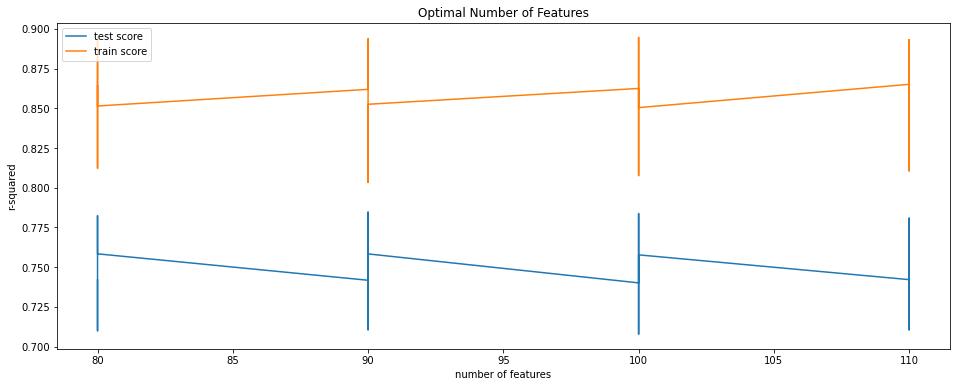

In [333]:
# plotting cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(cv_results["param_max_depth"], cv_results["mean_test_score"])
plt.plot(cv_results["param_max_depth"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left');

In [334]:
clf=RandomForestRegressor(bootstrap= True,
 max_depth=90,
 max_features=3,
 min_samples_leaf=3,
 min_samples_split=8,
 n_estimators=100)
clf.fit(x_train_l, y_train_l)

printScores(clf, x_test_l, y_test_l)

R^2:  0.8316204191643838
Mean MAE: 3.739 (0.896)
Mean RMSE: 5.068


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

model_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                        cv = 3, n_jobs = -1, verbose = 2,
                        scoring='r2',
                        return_train_score=True)

model_cv.fit(x_train_f, y_train_f)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  8.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [26]:
model_cv.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

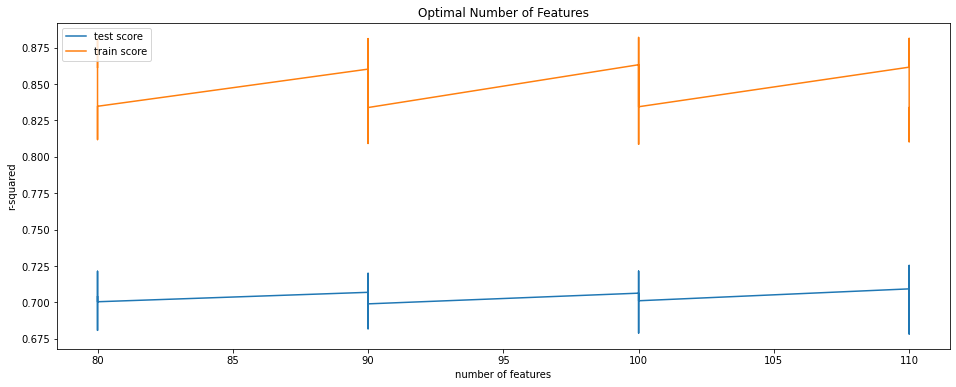

In [339]:
# plotting cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(cv_results["param_max_depth"], cv_results["mean_test_score"])
plt.plot(cv_results["param_max_depth"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left');

In [27]:
clf=RandomForestRegressor(bootstrap= True,
 max_depth=80,
 max_features=3,
 min_samples_leaf=3,
 min_samples_split=8,
 n_estimators=200)
clf.fit(x_train_f, y_train_f)

printScores(clf, x_test_f, y_test_f)

R^2:  0.787220046075549
Mean MAE: 15.004 (3.908)
Mean RMSE: 20.557


In [28]:
joblib.dump(clf, 'RF.pkl')

['RF.pkl']

### 6. Support Vector Regression

In [356]:
from sklearn.svm import SVR

tuned_parameters = [{'kernel': ['poly'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

model_cv = GridSearchCV(SVR(),
                        param_grid=tuned_parameters,
                        scoring='r2',
                        return_train_score=True)

model_cv.fit(x_train_l, y_train_l)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [357]:
model_cv.best_params_

{'C': 100, 'kernel': 'poly'}

In [366]:
clf=SVR(C= 100,
        kernel='poly')
clf.fit(x_train_l, y_train_l)

printScores(clf, x_test_l, y_test_l)

R^2:  0.8700607976509462
Mean MAE: 4.213 (1.818)
Mean RMSE: 6.471


In [367]:
joblib.dump(clf, 'SVR.pkl')

['SVR.pkl']

In [353]:
from sklearn.svm import SVR

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                   {'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

model_cv = GridSearchCV(SVR(),
                        param_grid=tuned_parameters,
                        scoring='r2',
                        return_train_score=True)

model_cv.fit(x_train_f, y_train_f)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [354]:
model_cv.best_params_

{'C': 100, 'kernel': 'poly'}

In [355]:
clf=SVR(C= 100,
        kernel='poly')
clf.fit(x_train_f, y_train_f)

printScores(clf, x_test_f, y_test_f)

R^2:  0.6161805695442437
Mean MAE: 17.355 (4.447)
Mean RMSE: 24.541


### 7. Elastic Net

In [359]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(x_train_l, y_train_l)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 0.010000
l1_ratio_: 0.840000


In [360]:
regr = ElasticNet(alpha=0.01, l1_ratio=0.84)
regr.fit(x_train_l,y_train_l)

printScores(regr, x_test_l, y_test_l)

R^2:  0.7941800317070317
Mean MAE: 3.325 (0.682)
Mean RMSE: 4.159


In [361]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(x_train_f, y_train_f)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 0.010000
l1_ratio_: 0.870000


In [362]:
regr = ElasticNet(alpha=0.010000, l1_ratio=0.87)
regr.fit(x_train_f,y_train_f)

printScores(regr, x_test_f, y_test_f)

R^2:  0.43515687912294526
Mean MAE: 21.710 (4.185)
Mean RMSE: 27.180


## 모델 성능 시각화

In [1]:
def draw_group_barchart(df,main_category,sub_category,fig_width=10,fig_height=10, \
                        bar_type='vertical', between_bar_padding=0.85,\
                        within_bar_padding=0.8, config_bar=None):
    '''
    Description :
    그룹바 차트를 그려주는 함수다. 
    
    Arguments :
    df = 메인 카테고리와 서브 카테고리로 이루어진 데이터, pd.DataFrame 객체여야 한다.
    main_category = 메인 카테고리 변수를 나타내는 문자열
    sub_category = 서브 카테고리 변수를 모아 놓은 리스트
    fig_width = 캔버스 폭
    fig_height = 캔버스 높이
    bar_type = 'vertical' 또는 'horizontal'값을 가질 수 있으며
               'vertical'은 수직 바 차트를 'horizontal'은 수평 바 차트를 그린다.
    between_bar_padding = 메인 카테고리 간 여백 조절 0~1사이의 값을 갖는다.
    within_bar_padding = 메인 카테고리 내 여백 조절 0~1사이의 값을 갖는다. 
    config_bar = 바 차트를 꾸미기 위한 옵션. 딕셔너리 형태로 넣어줘야 한다.
    
    Return : 
    그룹바 차트 출력
    '''
    
    ## Arguments 체크
    if not isinstance(main_category,str):
        print(f'main_category인자의 타입은 {type(main_category)}가 아니고 문자열 입니다.')
        return
    if not main_category in df.columns:
        print(f'데이터가 {main_category} 칼럼을 포함하고 있지 않습니다.')
        return
    if not set(sub_category).issubset(set(df.columns)):
        print(f'{set(sub_category)-set(df.columns)}가 데이터에 없습니다.')
        return
    if isinstance(bar_type,str):
        if not bar_type in ['vertical','horizontal']:
            print(f'bar_type인자에는 "vertical"과 "horizontal"만 허용됩니다.')
            return
    else:
        print(f'bar_type인자의 타입은 {type(bar_type)}가 아니고 문자열 입니다.')
        return
    
    if between_bar_padding < 0 or between_bar_padding > 1:
        print(f'between_bar_padding은 0보다 크거나 같고, 1보다 작거나 같아야합니다.')
        return
    if within_bar_padding < 0 or within_bar_padding > 1:
        print(f'within_bar_padding은 0보다 크거나 같고, 1보다 작거나 같아야합니다.')
        return
    
    ## 필요 모듈 임포트
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    %matplotlib inline 
 
    num_sub_category = len(sub_category) ## 서브 카테고리 개수
 
    fig = plt.figure(figsize=(fig_width,fig_height)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 색상 지정
    ax = fig.add_subplot() ## 그림이 그려질 축을 생성
    
    colors = sns.color_palette('hls',num_sub_category) ## 막대기 색상 지정
    
    tick_label = list(df[main_category].unique()) ## 메인 카테고리 라벨 생성
    tick_number = len(tick_label) ## 메인 카테고리 눈금 개수
    
    tick_coord = np.arange(tick_number) ## 메인 카테고리안에서 첫번째 서브 카테고리 막대기가 그려지는 x좌표
 
    width = 1/num_sub_category*between_bar_padding ## 막대기 폭 지정
 
    config_tick = dict()
    config_tick['ticks'] = [t + width*(num_sub_category-1)/2 for t in tick_coord] ## 메인 카테고리 라벨 x좌표
    config_tick['labels'] = tick_label 
 
    if bar_type == 'vertical': ## 수직 바 차트를 그린다.
        plt.xticks(**config_tick) ## x축 눈금 라벨 생성
 
        for i in range(num_sub_category):
            if config_bar: ## 바 차트 추가 옵션이 있는 경우
                ax.bar(tick_coord+width*i, df[sub_category[i]], \
                       width*within_bar_padding, label=sub_category[i], \
                       color=colors[i], **config_bar) ## 수직 바 차트 생성
            else:
                ax.bar(tick_coord+width*i, df[sub_category[i]], \
                       width*within_bar_padding, label=sub_category[i], \
                       color=colors[i]) ## 수직 바 차트 생성
        plt.legend() ## 범례 생성
        plt.savefig('fig03.png',format='png',dpi=300)
        plt.show()
    else: ## 수평 바 차트를 그린다.
        plt.yticks(**config_tick) ## x축 눈금 라벨 생성
 
        for i in range(num_sub_category):
            if config_bar: # 바 차트 추가 옵션이 있는 경우
                ax.barh(tick_coord+width*i, df[sub_category[i]], \
                       width*within_bar_padding, label=sub_category[i], \
                        color=colors[i], **config_bar) ## 수평 바 차트 생성
            else:
                ax.barh(tick_coord+width*i, df[sub_category[i]], \
                       width*within_bar_padding, label=sub_category[i], \
                       color=colors[i]) ## 수평 바 차트 생성
        plt.legend() ## 범례 생성
        plt.show()

  Quarter    A    B    C    D
0      1Q  300  400  250  100
1      2Q  100  200  500  200
2      3Q  300  400  200  300
3      4Q  250  100  300  400


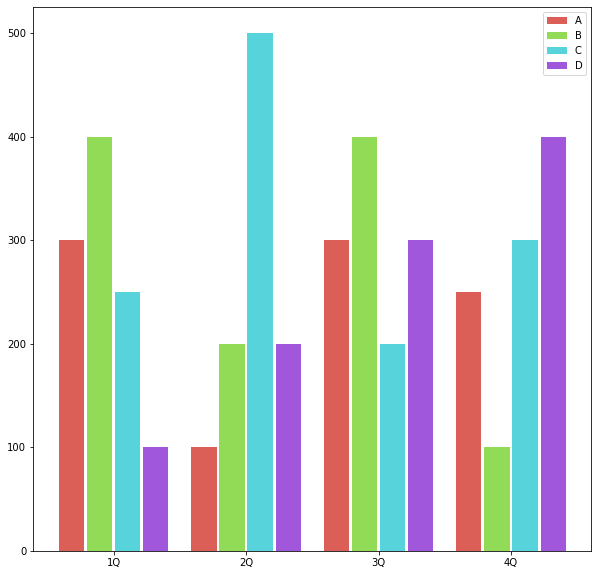

In [6]:
df = pd.DataFrame()
df['Quarter'] = ['1Q','2Q','3Q','4Q']
df['A'] = [300,100,300,250]
df['B'] = [400,200,400,100]
df['C'] = [250,500,200,300]
df['D'] = [100,200,300,400]

print(df)

main_category = 'Quarter' ## 메인 카테고리 지정
sub_category = ['A','B','C','D'] ## 서브카테고리 지정
 
draw_group_barchart(df,main_category,sub_category,\
                        bar_type='vertical', between_bar_padding=0.85,\
                        within_bar_padding=0.9, config_bar = None)

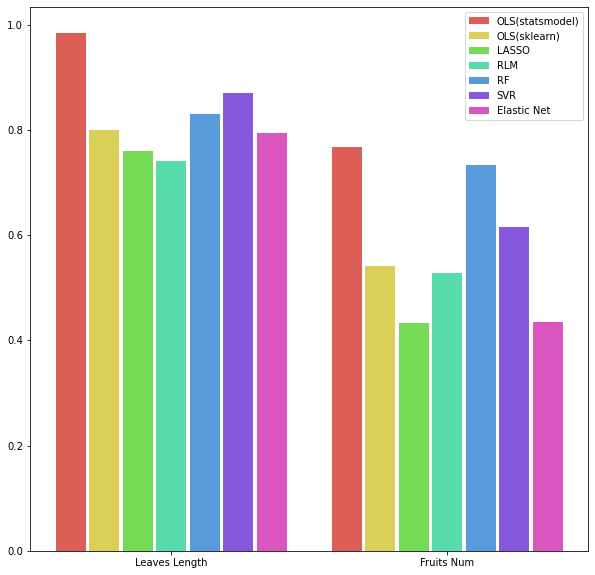

In [11]:
df = pd.DataFrame()
df['Method'] = ['Leaves Length', 'Fruits Num']
df['OLS(statsmodel)'] = [0.984, 0.768]
df['OLS(sklearn)']=[0.800, 0.541]
df['LASSO']=[0.760, 0.433]
df['RLM']=[0.740, 0.528]
df['RF']=[0.831, 0.734]
df['SVR']=[0.870, 0.616]
df['Elastic Net']=[0.794, 0.435]

main_category = 'Method' ## 메인 카테고리 지정
sub_category = ['OLS(statsmodel)', 'OLS(sklearn)', 'LASSO', 'RLM', 'RF', 'SVR', 'Elastic Net'] ## 서브카테고리 지정
 
draw_group_barchart(df,main_category,sub_category,
                    bar_type='vertical', between_bar_padding=0.85,
                    within_bar_padding=0.9, config_bar = None)